## 2. BMA Stellar Mass Validation: Cosmos

Comaparing the BMA stellar masses with Laigle et al. 2015 from the COSMOS field.

Note: The BMA code we run only on the DES filters: `g, r, i and z`.

###  Dataset

We use the otuput from the algoritgm BMA Stellar Mass (Palmese et al. 2019)

In [2]:
import numpy as np
from astropy.table import Table, vstack
from astropy.io.fits import getdata
import scipy.stats as st

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)

sns.set_style("whitegrid")
sns.set_context('talk',rc={"lines.linewidth": 2.5})

# 'font.sans-serif': ['Arial',
#   'DejaVu Sans',
#   'Liberation Sans',
#   'Bitstream Vera Sans',
#   'sans-serif'],

In [3]:
root  = '/data/des61.a/data/johnny/COSMOS/BMA/'
infile= root+'bma_test_large.fits'
gal  = Table(getdata(infile))

In [5]:
## load cosmos data
cosmos_infile = '/data/des61.a/data/johnny/COSMOS/COSMOS2015_Laigle+_v1.1.fits'
cosmos0  = Table(getdata(cosmos_infile))

## load des deep field
des_deep_field_infile = '/data/des61.a/data/johnny/COSMOS/y3_deep_fields.fits'
des0 = Table(getdata(des_deep_field_infile))

In [6]:
## make a cut
## match files
cosmos = cosmos0[gal['rowCOSMOS']]
des    = des0[gal['row']]


des['row']       = gal['row']
des['rowCOSMOS'] = gal['rowCOSMOS']
des['z_true']    = cosmos['PHOTOZ']

gal['z_true']    = cosmos['PHOTOZ']
gal['masst']     = cosmos['MASS_BEST']
gal['Mr']        = cosmos['MR']
gal['Mi']        = cosmos['MI']

In [7]:
gal.colnames

['rowCOSMOS',
 'mass_weight_age_err',
 'gi_o',
 'index',
 'rabs',
 'gr_o_err',
 'row',
 'gi_o_err',
 'iabs',
 'mass',
 'best_chisq',
 'mass_err',
 'kii_err',
 'kri_err',
 'ssfr_std',
 'kii',
 'best_model',
 'distmod',
 'best_zmet',
 'mcMass',
 'iobs',
 'taMass',
 'mass_weight_age',
 'kri',
 'zmet',
 'gr_o',
 'ssfr',
 'iz',
 'gr',
 'redshift',
 'i',
 'ierr',
 'grerr',
 'izerr',
 'indices',
 'rierr',
 'ri',
 'z_true',
 'masst',
 'Mr',
 'Mi']

In [8]:
cosmos0.colnames

['ALPHA_J2000',
 'DELTA_J2000',
 'NUMBER',
 'X_IMAGE',
 'Y_IMAGE',
 'ERRX2_IMAGE',
 'ERRY2_IMAGE',
 'ERRXY_IMAGE',
 'FLAG_HJMCC',
 'FLUX_RADIUS',
 'KRON_RADIUS',
 'EBV',
 'FLAG_PETER',
 'FLAG_COSMOS',
 'FLAG_DEEP',
 'FLAG_SHALLOW',
 'Ks_FLUX_APER2',
 'Ks_FLUXERR_APER2',
 'Ks_FLUX_APER3',
 'Ks_FLUXERR_APER3',
 'Ks_MAG_APER2',
 'Ks_MAGERR_APER2',
 'Ks_MAG_APER3',
 'Ks_MAGERR_APER3',
 'Ks_MAG_AUTO',
 'Ks_MAGERR_AUTO',
 'Ks_MAG_ISO',
 'Ks_MAGERR_ISO',
 'Ks_FLAGS',
 'Ks_IMAFLAGS_ISO',
 'Y_FLUX_APER2',
 'Y_FLUXERR_APER2',
 'Y_FLUX_APER3',
 'Y_FLUXERR_APER3',
 'Y_MAG_APER2',
 'Y_MAGERR_APER2',
 'Y_MAG_APER3',
 'Y_MAGERR_APER3',
 'Y_MAG_AUTO',
 'Y_MAGERR_AUTO',
 'Y_MAG_ISO',
 'Y_MAGERR_ISO',
 'Y_FLAGS',
 'Y_IMAFLAGS_ISO',
 'H_FLUX_APER2',
 'H_FLUXERR_APER2',
 'H_FLUX_APER3',
 'H_FLUXERR_APER3',
 'H_MAG_APER2',
 'H_MAGERR_APER2',
 'H_MAG_APER3',
 'H_MAGERR_APER3',
 'H_MAG_AUTO',
 'H_MAGERR_AUTO',
 'H_MAG_ISO',
 'H_MAGERR_ISO',
 'H_FLAGS',
 'H_IMAFLAGS_ISO',
 'J_FLUX_APER2',
 'J_FLUXERR_APER2',


###  Stellar Mass Validation

In this section we measure the stellar mass accuracy of BMA Stellar Mass.

In [9]:
gal.columns

<TableColumns names=('rowCOSMOS','mass_weight_age_err','gi_o','index','rabs','gr_o_err','row','gi_o_err','iabs','mass','best_chisq','mass_err','kii_err','kri_err','ssfr_std','kii','best_model','distmod','best_zmet','mcMass','iobs','taMass','mass_weight_age','kri','zmet','gr_o','ssfr','iz','gr','redshift','i','ierr','grerr','izerr','indices','rierr','ri','z_true','masst','Mr','Mi')>

In [10]:
def remove_nan(x):
    return np.logical_not(np.isnan(x))
    
def mass_hist_residual(x1,x2,lb='residual',ci='r'):
    cut = remove_nan(x2)
    x = x2[cut]-x1[cut]
    x = x[remove_nan(x)]
    sns.kdeplot(x, shade=True, label=lb, color=ci);
    plt.axvline(np.nanmean(x),linestyle='--',color=ci)
    
    print('mean:',np.round(np.nanmean(x),2))

In [11]:
def get_residual_variables(data,kind,cut=[None,None]):
    zcls = data['z_true']
    if kind=='mass':
        res  = (data['masst']-data['mass'])
        xvar = data['mass']
    else:
        res  = data['rabs']-data['Mr']
        xvar = data['Mr']
    xvar = 10**data['masst']
    mask = np.logical_not(np.isnan(res))
    if cut[0] is not None:
        mask &= data[cut[0]] >= cut[1]
        
    return zcls[mask],res[mask], xvar[mask]

def evolution(data,col,ax=None,s=5,alpha=0.1,title=''):
    if ax is None: ax=plt.axes()
    x = data['z_true']
    y = data[col]
    ax.scatter(x,y,s=s,alpha=alpha)
    ax.set_xlabel(r'$z_{true}$')
    ax.set_title(title)
    
def residual_evolution(data,kind,cut=[None,None],ax=None,s=5,alpha=0.1,title='',label=True):
    if ax is None: ax=plt.axes()
    z,residual,_ = get_residual_variables(data,kind,cut=cut)
    ax.scatter(z,residual,s=s,alpha=alpha)
    if label: ax.set_xlabel(r'$z_{true}$')
    ax.set_title(title)

def residual_logmas(data,kind,cut=[None,None],ax=None,s=5,alpha=0.1,title='',density=False,log=True,color='b'):
    if ax is None: ax=plt.axes()
    zcls,residual,xvar = get_residual_variables(data,kind,cut=cut)
    if density:
        idx = np.argsort(-1*zcls)[::1]
        im = ax.scatter(xvar[idx],residual[idx],s=s,alpha=alpha,c=zcls[idx],cmap='Paired')
        fig.colorbar(im,ax=ax)
    else:
        ax.scatter(xvar,residual,s=s,alpha=alpha)
    ax.set_xlabel(r'Log($M_{\star}^{COSMOS}/ M_{\odot}$)')
    ax.set_title(title)
    if log: ax.set_xscale('log')

In [12]:
mass_label = r'Log $\left(M_{\star}^{COSMOS} / M_{\star}^{BMA} \right)$'
mr_label   = r'$M_r^{BMA}-M_r^{COSMOS}$'
residual_labels = [mass_label,mr_label]

In [13]:
zcls  = gal['z_true']
mass  = gal['mass']
mass_t= gal['masst']

magi  = gal['iobs']

mask = (zcls<0.65)&(magi<23.)&(mass_t>9.)

chisqr = gal['best_chisq']

bad   = chisqr>100

Text(0.5,0,'$\\chi^{2}$')

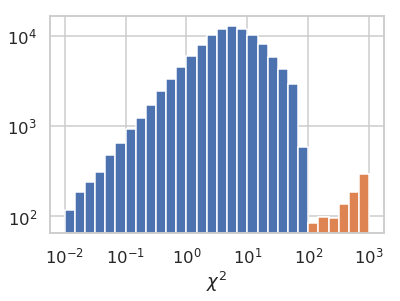

In [14]:
plt.hist(chisqr,bins=np.logspace(-2,3,31))
plt.hist(chisqr[bad],bins=np.logspace(-2,3,31))
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\chi^{2}$')

Text(0,0.5,'Log $\\left(M_{\\star}^{COSMOS} / M_{\\star}^{BMA} \\right)$')

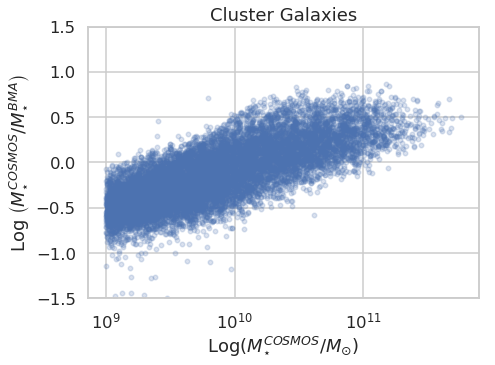

In [15]:
fig, axis = plt.subplots(1, 1, figsize=(7,5), sharex='all',sharey='all')
residual_logmas(gal[mask] ,'mass',alpha=0.2,s=20,ax=axis,title='Cluster Galaxies',density=False)
axis.set_ylim(-1.5,1.5)
axis.set_ylabel(mass_label)

Text(0,0.5,'$M_r^{BMA}-M_r^{COSMOS}$')

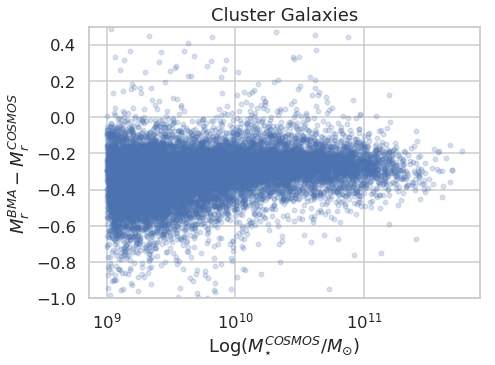

In [16]:
fig, axis = plt.subplots(1, 1, figsize=(7,5), sharex='all',sharey='all')
residual_logmas(gal[mask] ,'Mr',alpha=0.2,s=20,ax=axis,title='Cluster Galaxies',density=False)
axis.set_ylim(-1.,0.5)
axis.set_ylabel(mr_label)

In [17]:
colorList = ['#A93226','#2E86C1','#273746']

('mean:', -0.14)


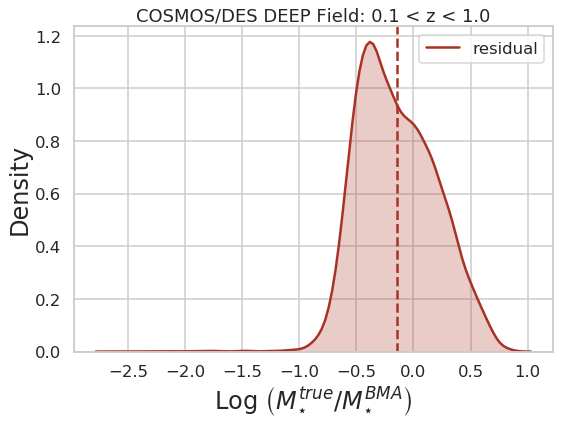

In [18]:
import warnings; warnings.simplefilter('ignore')
plt.figure(figsize=(8,6))
mass_hist_residual(mass[mask],mass_t[mask],ci=colorList[0])
# mass_hist_residual(mass[optimal],mass_t[optimal],ci=colorList[1],lb='Opt. Selection')
#mass_hist_residual(mass[bads],mass_t[bads],ci=colorList[2],lb='Est.  Members')

# plt.xlim(-1.5,1.5)
plt.xlabel(r'Log $\left(M_{\star}^{true} / M_{\star}^{BMA} \right)$',fontsize=24)
plt.ylabel('Density',fontsize=24)
plt.title('COSMOS/DES DEEP Field: 0.1 < z < 1.0')
plt.tight_layout()
plt.savefig('stellar_masss_residual_all_0.png')

In [19]:
# import warnings; warnings.simplefilter('ignore')
# plt.figure(figsize=(8,6))
# mass_hist_residual(mass[mask],mass_t[mask],ci=colorList[0],lb='True Members')
# mass_hist_residual(mass[optimal],mass_t[optimal],ci=colorList[1],lb='Opt. Selection')
# mass_hist_residual(mass[bads],mass_t[bads],ci=colorList[2],lb='Est.  Members')

# plt.xlim(-1.5,1.5)
# plt.xlabel(r'Log $\left(M_{\star}^{true} / M_{\star}^{BMA} \right)$',fontsize=24)
# plt.ylabel('Density',fontsize=24)
# plt.title('cosmoDC2: 0.1 < z < 1.0')
# plt.tight_layout()
# plt.savefig('stellar_masss_residual_all.png')

In [20]:
#### Redshift Dependence

In [21]:
def makeBins(variable,xedges):
    nsize=len(xedges)-1
    xbins = (xedges[1:]+xedges[:-1])/2
    indices = [ np.where((variable >= xedges[i]) & (variable < xedges[i + 1]))[0] for i in range(nsize)]
    return indices, xbins


In [22]:
zbins = np.array([0.1,0.2,0.4,0.6,0.8,1.0])
zlabels = ['%.2f < z < %.2f'%(zl,zh) for zl,zh in zip(zbins[:-1],zbins[1:])]

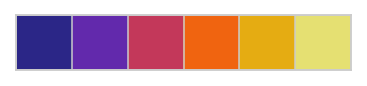

In [23]:
sns.palplot(sns.color_palette("CMRmap"))

In [24]:
colorGradient = sns.color_palette("CMRmap")[:5]

('mean:', -0.32)
('mean:', -0.2)
('mean:', -0.12)
('mean:', 0.04)
('mean:', nan)


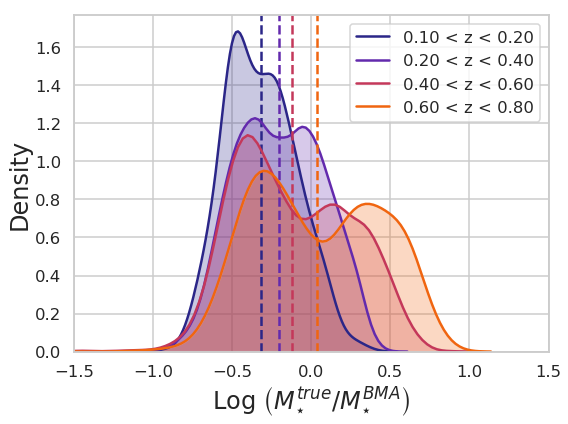

In [25]:
zcls = gal['redshift']

keys, zmean = makeBins(zcls[mask],zbins)

plt.figure(figsize=(8,6))
for i,idx in enumerate(keys):
    mass_hist_residual(mass[mask][idx],mass_t[mask][idx],ci=colorGradient[i],lb=zlabels[i])
    
plt.xlim(-1.5,1.5)
plt.xlabel(r'Log $\left(M_{\star}^{true} / M_{\star}^{BMA} \right)$',fontsize=24)
plt.ylabel('Density',fontsize=24)
plt.tight_layout()
plt.savefig('stellar_masss_residual_redshift_bins.png')

('mean:', 0.12)
('mean:', 0.23)
('mean:', 0.41)
('mean:', 0.57)
('mean:', nan)


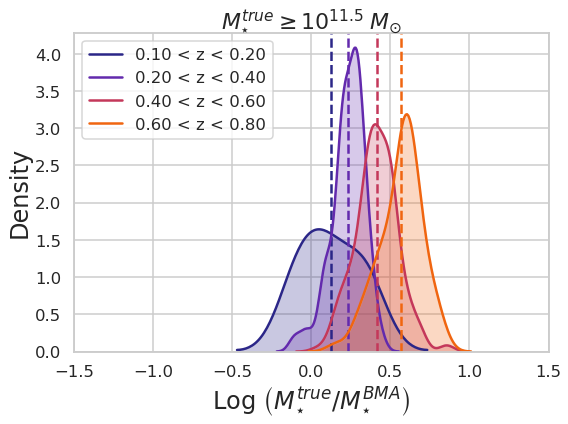

In [26]:
zcls = gal['redshift']

mask2= (mass_t>(11.))&(mask)

keys, zmean = makeBins(zcls[mask2],zbins)

plt.figure(figsize=(8,6))
for i,idx in enumerate(keys):
    mass_hist_residual(mass[mask2][idx],mass_t[mask2][idx],ci=colorGradient[i],lb=zlabels[i])
    
plt.xlim(-1.5,1.5)
plt.xlabel(r'Log $\left(M_{\star}^{true} / M_{\star}^{BMA} \right)$',fontsize=24)
plt.ylabel('Density',fontsize=24)
plt.title(r'$M_{\star}^{true}\geq 10^{11.5} \; M_{\odot}$',fontsize=22)
plt.tight_layout()
plt.savefig('stellar_masss_residual_redshift_bins.png')

('mean:', -0.09)
('mean:', 0.04)
('mean:', 0.21)
('mean:', 0.36)
('mean:', nan)


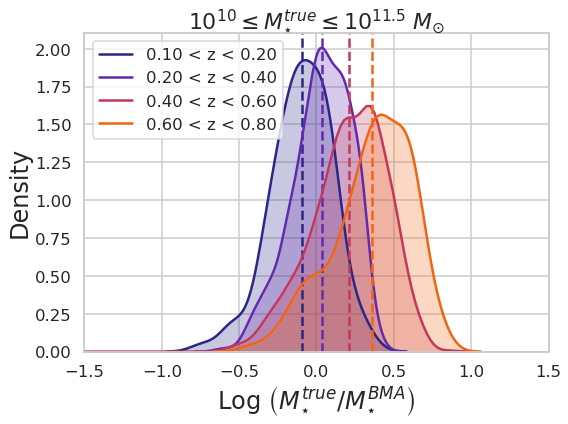

In [27]:
zcls = gal['redshift']

mask2= (mass_t>(10))&(mass_t<(11.5))&(mask)

keys, zmean = makeBins(zcls[mask2],zbins)

plt.figure(figsize=(8,6))
for i,idx in enumerate(keys):
    mass_hist_residual(mass[mask2][idx],mass_t[mask2][idx],ci=colorGradient[i],lb=zlabels[i])
    
plt.xlim(-1.5,1.5)
plt.xlabel(r'Log $\left(M_{\star}^{true} / M_{\star}^{BMA} \right)$',fontsize=24)
plt.ylabel('Density',fontsize=24)
plt.title(r'$ 10^{10} \leq M_{\star}^{true}\leq 10^{11.5} \; M_{\odot}$',fontsize=22)
plt.tight_layout()
plt.savefig('stellar_masss_residual_redshift_bins.png')

('mean:', 0.08)
('mean:', 0.25)
('mean:', 0.37)
('mean:', 0.47)


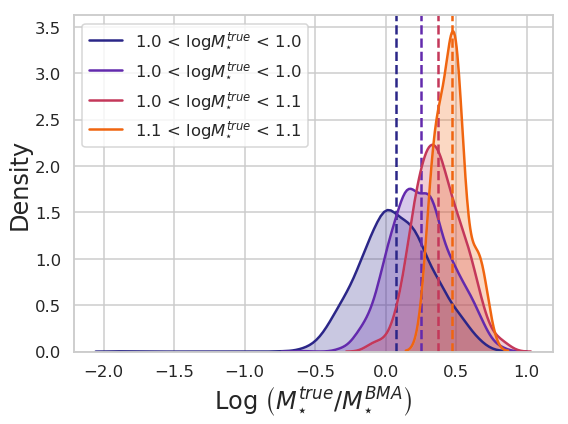

In [28]:
massbins = np.log10(np.logspace(10,12.,5))
mlabels = ['%.1f < $\log{M_{\star}^{true}}$ < %.1f'%(np.log10(ml),np.log10(mh)) for ml,mh in zip(massbins[:-1],massbins[1:])]

mask2 = mask#&(zcls>0.4)&(zcls<0.6)
keys, zmean = makeBins(mass_t[mask2],massbins)

plt.figure(figsize=(8,6))
for i,idx in enumerate(keys):
    mass_hist_residual(mass[mask2][idx],mass_t[mask2][idx],ci=colorGradient[i],lb=mlabels[i])
    
# plt.xlim(-1.5,1.5)
plt.xlabel(r'Log $\left(M_{\star}^{true} / M_{\star}^{BMA} \right)$',fontsize=24)
plt.ylabel('Density',fontsize=24)
plt.tight_layout()
plt.savefig('stellar_masss_residual_redshift_bins.png')

(array([8.0000e+00, 1.2000e+02, 1.0220e+03, 3.7930e+03, 1.8782e+04,
        4.2704e+04, 3.2625e+04, 1.2712e+04, 1.2690e+03, 8.0000e+00]),
 array([0.74892019, 0.78327185, 0.8176235 , 0.85197516, 0.88632682,
        0.92067848, 0.95503013, 0.98938179, 1.02373345, 1.05808511,
        1.09243676]),
 <a list of 10 Patch objects>)

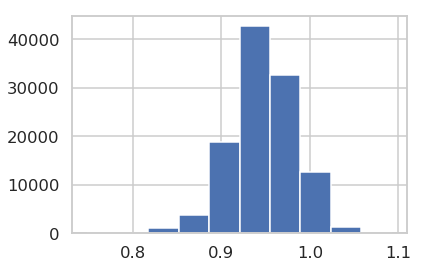

In [29]:
plt.hist(np.log10(mass))

In [30]:
def mass_scatter_residual(x1,x2,x3,zlabel='$z_{cls}$'):
    cut = remove_nan(x2)
    x = x2[cut]-x1[cut]
    
    idx = np.argsort(-1*x3)
    plt.scatter(np.log10(x1)[idx],x[idx],c=x3[idx],cmap='RdBu',s=5,alpha=0.8)
    cbar = plt.colorbar()
    cbar.set_label(zlabel)

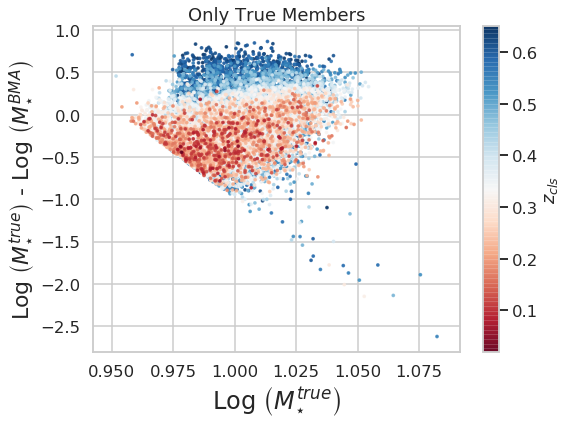

In [31]:
plt.figure(figsize=(8,6))
mass_scatter_residual(mass[mask],mass_t[mask],zcls[mask])
plt.ylabel(r'Log $\left(M_{\star}^{true} \right)$ - Log $\left( M_{\star}^{BMA} \right)$',fontsize=22)
plt.xlabel(r'Log $\left(M_{\star}^{true} \right)$',fontsize=24)

# plt.xlim(9.5,12.5)
# plt.ylim(-1.5,1.5)
plt.title('Only True Members')
plt.tight_layout()
plt.savefig('stellar_mass_residual_mtrue.png')

In [32]:
magi = gal['mag'][:,3]
amag = gal['rabs']
pmem = gal['Pmem']

KeyError: 'mag'

In [ ]:
def get_percentile_curve(x,y,q=95,nbins=12):
    xedges = np.linspace(0.98*np.min(x),1.02*np.max(x),nbins)
    keys, xmean = makeBins(x,xedges)
    ypercentile = [np.percentile(y[idx],q) for idx in keys]
    return xmean, ypercentile
    
def plot_redshift_variable(x,y,q=95,ax=None,weights=None):
    if ax is None: ax = plt.axes()
    cut = remove_nan(y)
    x, y = x[cut], y[cut]
    
    if weights is not None: weights = weights[cut]
        
    xb, yp = get_percentile_curve(x,y,q=q,nbins=31)
    
    ax.hexbin(x,y,gridsize=(25,25),cmap='Reds',C=weights,reduce_C_function=np.sum)
    ax.plot(xb,yp,'k--',label='%ith percentile'%(q))
    ax.set_xlabel(r'$z_{cls}$',fontsize=24)
    ax.legend()

In [ ]:
plt.figure(figsize=(8,6))
plot_redshift_variable(zcls,magi,weights=pmem)
plt.xlim(0.1,1.0)
plt.ylim(15,24)
plt.ylabel('$m_{i}^{obs}$')
plt.tight_layout()
plt.savefig('mag_obs_cut.png')

In [ ]:
plt.figure(figsize=(8,6))
plot_redshift_variable(zcls,amag,weights=pmem)
plt.axhline(-19.8,color='k',linestyle='-.',label='old cut: $M_{r}=-19.8$')
plt.xlim(0.1,1.0)
plt.ylim(-19.5,-26)
plt.legend()
plt.ylabel('$M_{r}$')
plt.tight_layout()
plt.savefig('amag_cut.png')

In [ ]:
fig, ax = plt.subplots(1,2, sharey='row', sharex='row', figsize=(20,10))
fig.subplots_adjust(wspace=0.15)

plot_redshift_variable(zcls[bads],np.log10(mass[bads]),weights=pmem[bads],q=5,ax=ax[0])
plot_redshift_variable(zcls[mask],np.log10(mass_t[mask]),q=5, ax=ax[1])

ax[0].set_ylabel(r'Log $\left( M_{\star}^{BMA} \right)$',fontsize=24)
ax[1].set_ylabel(r'Log $\left( M_{\star}^{true} \right)$',fontsize=24)

ax[0].set_ylim(9.5,12.1)
ax[0].set_xlim(0.1,1.)

for i in range(2):
    ax[i].axhline(10,color='k',linestyle='-.',label='old cut upper limit')

ax[0].legend()
plt.tight_layout()

plt.savefig('stellar_mass_cut.png')